# Santander Bank Binary Classification

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

### Opening datasets

In [2]:
%%time
with open('../data/train.csv') as file:
    training_data = pd.read_csv(file)

with open('../data/test.csv') as file:
    testing_data = pd.read_csv(file)

CPU times: user 8.56 s, sys: 1.64 s, total: 10.2 s
Wall time: 13.8 s


### Data Preprocessing 

##### Peek at data

In [3]:
training_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
testing_data

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


##### Check for nan's

In [5]:
def nan_check(df):
    table = [['Column Name', 'Length of Column', 'Percentage of Null', 'Data Type']]
    for column in df:
        current_column = df[column]
        null_val_count = current_column.isna().sum()
        length_column = len(current_column)
        percentage_of_null = null_val_count/length_column
        data_type = current_column.dtypes
        temp_list = [str(column), length_column, percentage_of_null, data_type]
        table.append(temp_list)
    
    print(tabulate(table[1:], headers=table[0], tablefmt="simple"))

In [6]:
%%time
nan_check(training_data)

Column Name      Length of Column    Percentage of Null  Data Type
-------------  ------------------  --------------------  -----------
ID_code                    200000                     0  object
target                     200000                     0  int64
var_0                      200000                     0  float64
var_1                      200000                     0  float64
var_2                      200000                     0  float64
var_3                      200000                     0  float64
var_4                      200000                     0  float64
var_5                      200000                     0  float64
var_6                      200000                     0  float64
var_7                      200000                     0  float64
var_8                      200000                     0  float64
var_9                      200000                     0  float64
var_10                     200000                     0  float64
var_11                

In [7]:
%%time
nan_check(testing_data)

Column Name      Length of Column    Percentage of Null  Data Type
-------------  ------------------  --------------------  -----------
ID_code                    200000                     0  object
var_0                      200000                     0  float64
var_1                      200000                     0  float64
var_2                      200000                     0  float64
var_3                      200000                     0  float64
var_4                      200000                     0  float64
var_5                      200000                     0  float64
var_6                      200000                     0  float64
var_7                      200000                     0  float64
var_8                      200000                     0  float64
var_9                      200000                     0  float64
var_10                     200000                     0  float64
var_11                     200000                     0  float64
var_12              

##### Check for Duplicate Values

In [8]:
%%time
features = training_data.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = training_data[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = testing_data[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

CPU times: user 4.22 s, sys: 5.78 ms, total: 4.22 s
Wall time: 4.22 s


In [9]:
# Top 15 duplucates in training_data
(pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).sort_values(by = 'Max duplicates', ascending=False).head(15)

,Feature,Max duplicates,Value
68,var_68,1084,5.0214
108,var_108,313,14.1999
126,var_126,305,11.5356
12,var_12,203,13.5545
91,var_91,66,6.9785
103,var_103,61,1.6662
148,var_148,59,4.0456
71,var_71,54,0.7031
161,var_161,52,5.7688
25,var_25,41,13.6723


In [10]:
# Top 15 duplicates in testing_data
(pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).sort_values(by = 'Max duplicates', ascending=False).head(15)

,Feature,Max duplicates,Value
68,var_68,1104,5.0197
126,var_126,307,11.5357
108,var_108,302,14.1999
12,var_12,188,13.5546
91,var_91,86,6.9939
103,var_103,78,1.4659
148,var_148,74,4.0004
161,var_161,69,5.7114
25,var_25,60,13.5965
71,var_71,60,0.5389


### Descriptive Statistics

In [11]:
def histogram_describe(data):
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(14,14))
    
    for index, column in enumerate(training_describe):
        plt.subplot(4,4,index+1)
        plt.hist(training_describe[column], bins=30)
        plt.xlabel(column, fontsize=9)
        plt.ylabel('Frequency')
    plt.show()

In [12]:
%%time
training_describe = training_data.describe().T
training_describe

CPU times: user 1.45 s, sys: 534 µs, total: 1.45 s
Wall time: 1.45 s


,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
...,...,...,...,...,...,...,...,...
var_195,200000.0,-0.142088,1.429372,-5.2610,-1.170700,-0.17270,0.829600,4.2729
var_196,200000.0,2.303335,5.454369,-14.2096,-1.946925,2.40890,6.556725,18.3215
var_197,200000.0,8.908158,0.921625,5.9606,8.252800,8.88820,9.593300,12.0004
var_198,200000.0,15.870720,3.010945,6.2993,13.829700,15.93405,18.064725,26.0791


<Figure size 432x288 with 0 Axes>

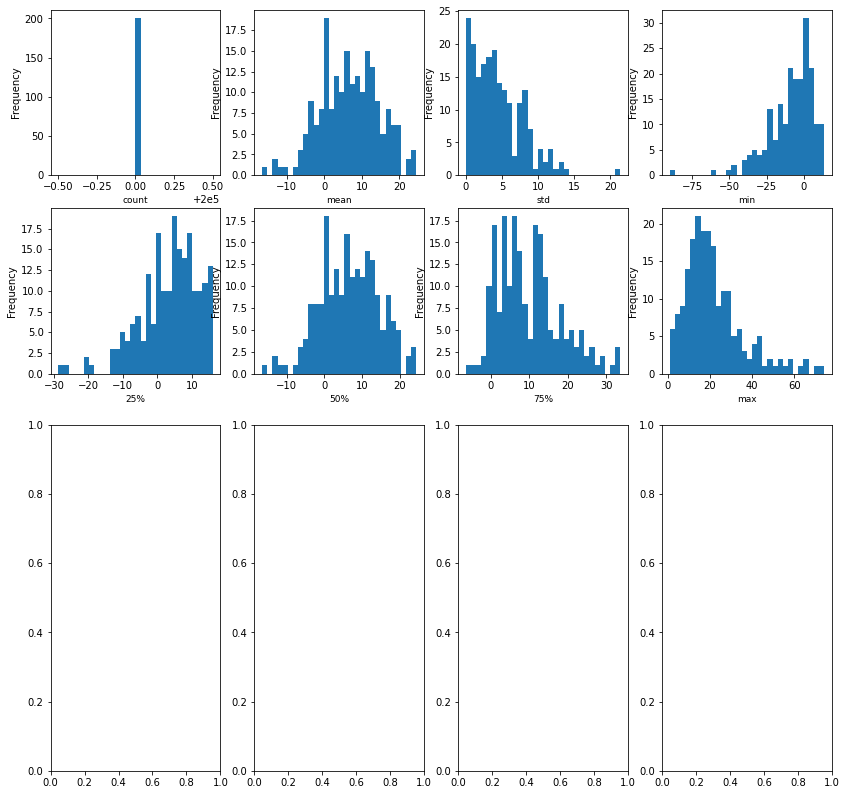

In [13]:
histogram_describe(training_describe)

In [14]:
%%time
test_describe = testing_data.describe().T
test_describe

CPU times: user 1.69 s, sys: 0 ns, total: 1.69 s
Wall time: 1.69 s


,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.658737,3.036716,0.1887,8.442975,10.51380,12.739600,22.3234
var_1,200000.0,-1.624244,4.040509,-15.0434,-4.700125,-1.59050,1.343400,9.3851
var_2,200000.0,10.707452,2.633888,2.3552,8.735600,10.56070,12.495025,18.7141
var_3,200000.0,6.788214,2.052724,-0.0224,5.230500,6.82235,8.327600,13.1420
var_4,200000.0,11.076399,1.616456,5.4844,9.891075,11.09975,12.253400,16.0371
...,...,...,...,...,...,...,...,...
var_195,200000.0,-0.133657,1.429678,-4.9119,-1.160700,-0.16200,0.837900,4.5454
var_196,200000.0,2.290899,5.446346,-13.9442,-1.948600,2.40360,6.519800,15.9207
var_197,200000.0,8.912428,0.920904,6.1696,8.260075,8.89280,9.595900,12.2758
var_198,200000.0,15.869184,3.008717,6.5840,13.847275,15.94340,18.045200,26.5384


<Figure size 432x288 with 0 Axes>

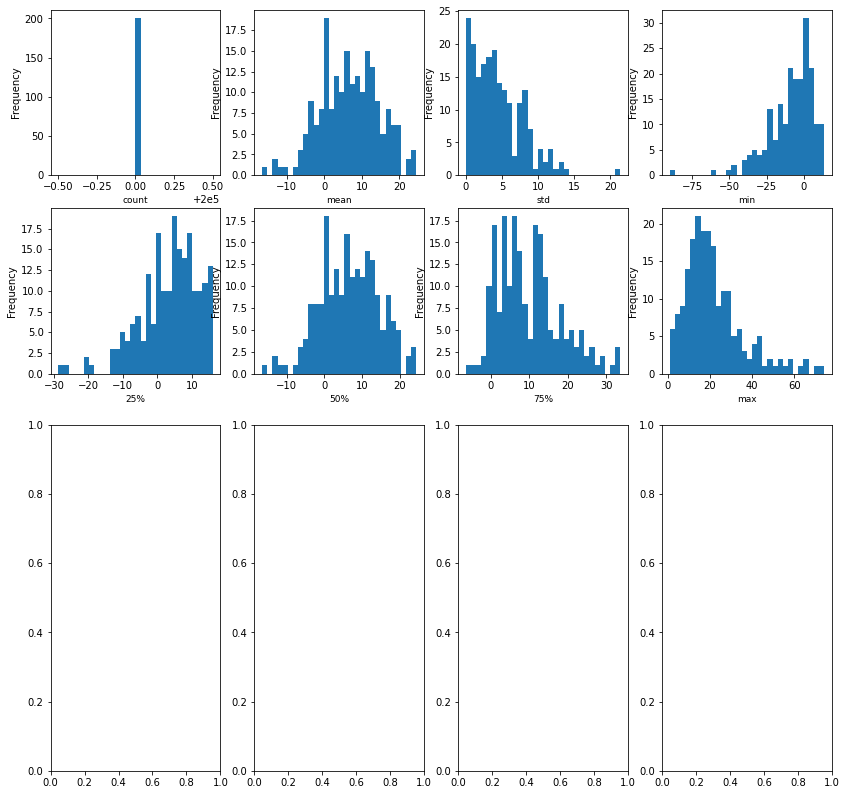

In [15]:
histogram_describe(test_describe)

##### Distribution of target variable

In [16]:
target_counts = training_data['target'].value_counts()

<BarContainer object of 2 artists>

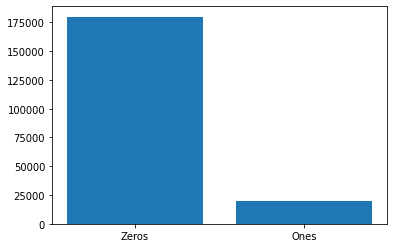

In [17]:
plt.bar(['Zeros', 'Ones'], target_counts)

In [18]:
print('{}% of target_counts are 1s'.format(100 * target_counts[1]/len(training_data)))

10.049% of target_counts are 1s


##### Features Correlation

In [21]:
%%time
correlations = training_data[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

CPU times: user 1.31 s, sys: 78.8 ms, total: 1.39 s
Wall time: 1.39 s


In [22]:
# Highest correlations 
correlations.tail(10)

,level_0,level_1,0
9890,var_26,var_48,0.007992
9891,var_48,var_26,0.007992
9892,var_26,var_72,0.008062
9893,var_72,var_26,0.008062
9894,var_2,var_13,0.008795
9895,var_13,var_2,0.008795
9896,var_1,var_80,0.008855
9897,var_80,var_1,0.008855
9898,var_80,var_6,0.008958
9899,var_6,var_80,0.008958


In [23]:
# Lowest correlations
correlations.head(10)

,level_0,level_1,0
0,var_84,var_2,0.000002
1,var_2,var_84,0.000002
2,var_63,var_5,0.000002
3,var_5,var_63,0.000002
4,var_62,var_99,0.000003
5,var_99,var_62,0.000003
6,var_40,var_75,0.000003
7,var_75,var_40,0.000003
8,var_17,var_51,0.000005
9,var_51,var_17,0.000005


## Dimension Reduction

### PCA


##### Standardizing Data

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [25]:
training_int_vals_only = training_data.iloc[:,2:]
training_target_vals_only = training_data['target']

In [26]:
%%time
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(training_int_vals_only, training_target_vals_only))

CPU times: user 421 ms, sys: 100 ms, total: 521 ms
Wall time: 518 ms


In [27]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.265814,0.279509,-0.928851,-1.606375,-0.454632,2.120424,0.302273,-0.407906,-0.271576,-1.538651,...,0.637526,1.915840,1.394910,-0.599439,0.009925,-1.155623,-0.025161,-0.407496,0.264130,-1.392947
199996,-1.896359,-0.202660,2.268180,-0.079297,-1.705783,-0.699136,0.543790,1.476902,-1.189411,-1.267410,...,0.378661,-0.920696,-0.830643,-0.375167,1.364499,1.312319,-0.819242,-2.350481,0.011518,0.351154
199997,0.178710,-0.845469,-0.076676,-0.563266,-1.070350,-0.043657,-0.984818,1.466106,-0.049199,-1.137053,...,0.182166,-0.660547,0.795012,0.387655,1.766202,-1.001499,-0.187031,-0.209042,-0.676806,0.721024
199998,-0.317467,-1.723980,1.096301,-0.491128,0.886530,0.712074,0.737304,0.137314,-0.743186,0.961052,...,-0.120713,0.403634,0.545083,1.950397,0.772535,0.044417,0.824051,1.221803,-0.113526,-1.012989


##### Correlation Heatmap prior to PCA.

CPU times: user 5.44 s, sys: 267 ms, total: 5.71 s
Wall time: 5.52 s


<AxesSubplot:>

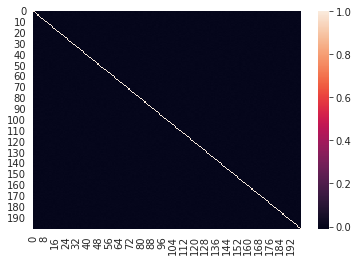

In [28]:
%%time
sns.heatmap(scaled_data.corr())

In [29]:
%%time
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

CPU times: user 14.6 s, sys: 10.9 s, total: 25.5 s
Wall time: 3.47 s


In [30]:
V = pca.components_.T
data_pca = pd.DataFrame(V,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca

,PC1,PC2,PC3,PC4,PC5
0,0.095940,-0.138371,-0.036096,-0.101407,-0.050106
1,0.030693,0.096773,0.111278,-0.066152,-0.027514
2,0.086224,-0.019372,0.007494,0.038464,0.139865
3,-0.003808,-0.032990,-0.102934,-0.115056,-0.039464
4,0.018681,0.002764,0.033794,-0.042179,0.020975
...,...,...,...,...,...
195,-0.065827,-0.080978,0.109609,0.058787,-0.073955
196,0.075368,0.043280,-0.095222,-0.135664,-0.087781
197,-0.027172,-0.003207,-0.135596,0.010573,-0.074083
198,-0.096338,0.004154,0.013163,0.058558,0.006524


### PCA Scree Plot

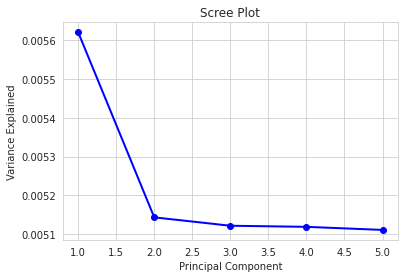

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

##### Correlation Heatmap after PCA.

CPU times: user 69.8 ms, sys: 42.9 ms, total: 113 ms
Wall time: 58.4 ms


<AxesSubplot:>

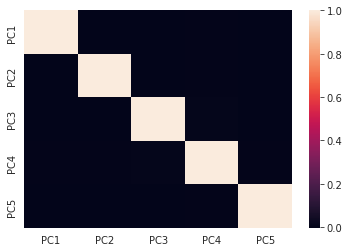

In [32]:
%%time
sns.heatmap(data_pca.corr())

In [33]:
data_pca.to_csv('../data/principal_components.csv')

### Random Forest for Dimension Reduction

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
training_data.target

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

In [36]:
%%time
df_scaled = scaled_data
model = RandomForestRegressor(random_state=1, max_depth=5, verbose=3)
model.fit(df_scaled,training_data.target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 29.1min finished


RandomForestRegressor(max_depth=5, random_state=1, verbose=3)

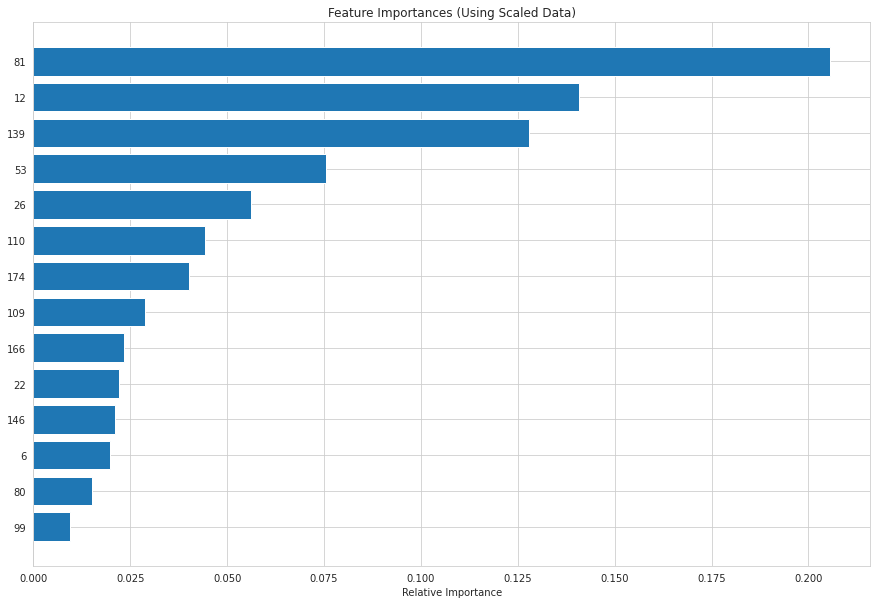

In [38]:
features = df_scaled.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-14:]  # top 15 features
plt.figure(figsize=(15,10))
plt.title('Feature Importances (Using Scaled Data)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### VIF for Dimension Rediuction

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
%%time
vif_data = pd.DataFrame()
vif_data['Features'] = training_int_vals_only.columns
vif_data['VIF'] = [variance_inflation_factor(training_int_vals_only.values, i) for i in range(len(training_int_vals_only.columns))]

CPU times: user 4h 4min 7s, sys: 2h 31min 49s, total: 6h 35min 56s
Wall time: 55min 20s


In [41]:
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=True)[-25:]

Text(0.5, 0, 'VIF')

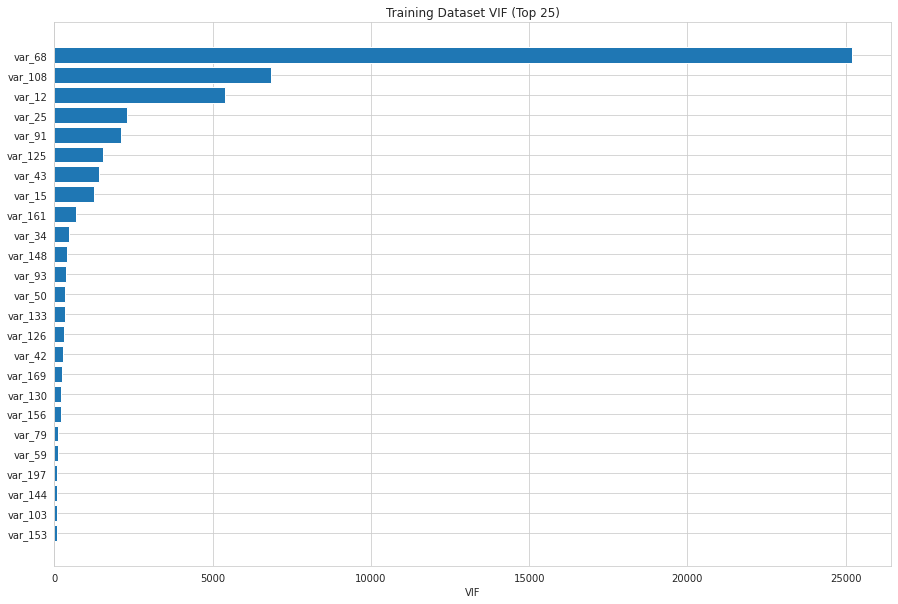

In [42]:
plt.figure(figsize=(15,10))
plt.barh(vif_data_sorted['Features'], vif_data_sorted['VIF'])
plt.title('Training Dataset VIF (Top 25)')
plt.xlabel('VIF')

### Excluding Columns 

In [43]:
reduced_training_data = training_data.drop(list(vif_data_sorted['Features']), axis=1)
reduced_training_data.to_csv('../data/reduced_training_data.csv', index=False)

In [44]:
reduced_testing_data = testing_data.drop(list(vif_data_sorted['Features']), axis=1)
reduced_testing_data.to_csv('../data/reduced_testing_data.csv', index=False)